# Tugas 7 PCD -  Konvolusi

- Nama : Abdullah Mu'adz Muflih
- NIM  : 1306620078

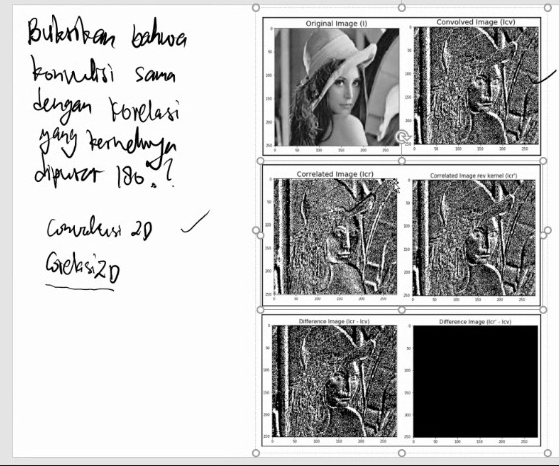

#### 1. Buktikan bahwa operasi konvolusi sama dengan operasi korelasi yang kernelnya diputar 180 derajat.

In [1]:
import numpy as np
from scipy import ndimage, misc, signal
import matplotlib.pyplot as plt
import cv2 as cv
import time

In [2]:
def rotate90Clockwise(A):
    N = len(A[0])
    for i in range(N // 2):
        for j in range(i, N - i - 1):
            temp = A[i][j]
            A[i][j] = A[N - 1 - j][i]
            A[N - 1 - j][i] = A[N - 1 - i][N - 1 - j]
            A[N - 1 - i][N - 1 - j] = A[j][N - 1 - i]
            A[j][N - 1 - i] = temp
    return A

In [3]:
image = cv.imread('gambar.jpg')
img_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Gray Image')

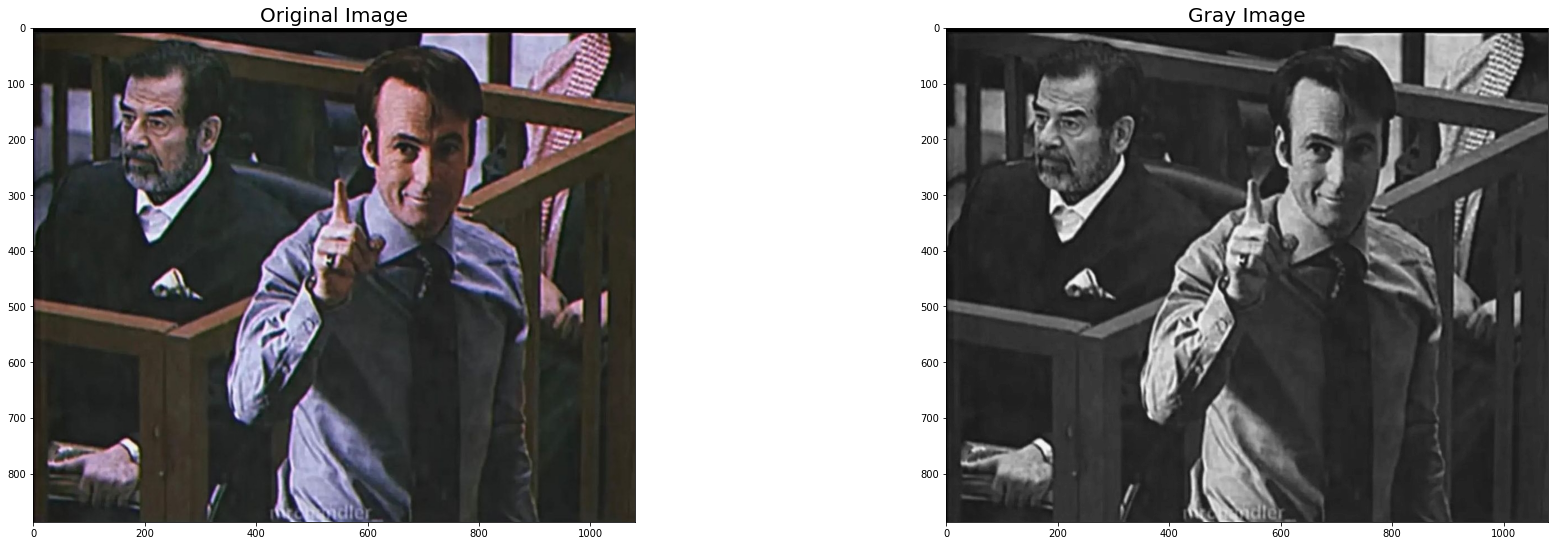

In [4]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(img_rgb,cmap=plt.cm.gray)
plt.title('Original Image',fontsize = 20)

plt.subplot(222)
plt.imshow(img_gray,cmap=plt.cm.gray)
plt.title('Gray Image',fontsize = 20)

In [60]:
#Kernel Edge for x and y axis
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernel_rotate90 = rotate90Clockwise(kernel.copy())

#Rotate Kernel Edge for x and y axis
kernel_rotate180 = kernel.copy()
for a in range(2):
    rotate90Clockwise(kernel_rotate180)
kernel_rotate270 = rotate90Clockwise(kernel_rotate180.copy())

In [61]:
#Detection for x and y axis
conv_x = signal.convolve2d(img_gray,kernel)
conv_y = signal.convolve2d(img_gray,kernel_rotate90)

#Correlation fot x and y axis
corr_x = signal.correlate2d(img_gray,kernel)
corr_y = signal.correlate2d(img_gray,kernel_rotate90)

#joinin the result for x and y
fix_conv = np.sqrt(conv_x*conv_x+conv_y*conv_y)
fix_corr = np.sqrt(corr_x*corr_x+corr_y*corr_y)

#rotate correlation
rotate_corr_x = signal.correlate2d(img_gray,kernel_rotate180)
rotate_corr_y = signal.correlate2d(img_gray,kernel_rotate270)

fix_rotate = np.sqrt(rotate_corr_x*rotate_corr_x+rotate_corr_y*rotate_corr_y)

#prove
minus = fix_conv-fix_rotate

Text(0.5, 1.0, 'Convolution-Correlation Rotate')

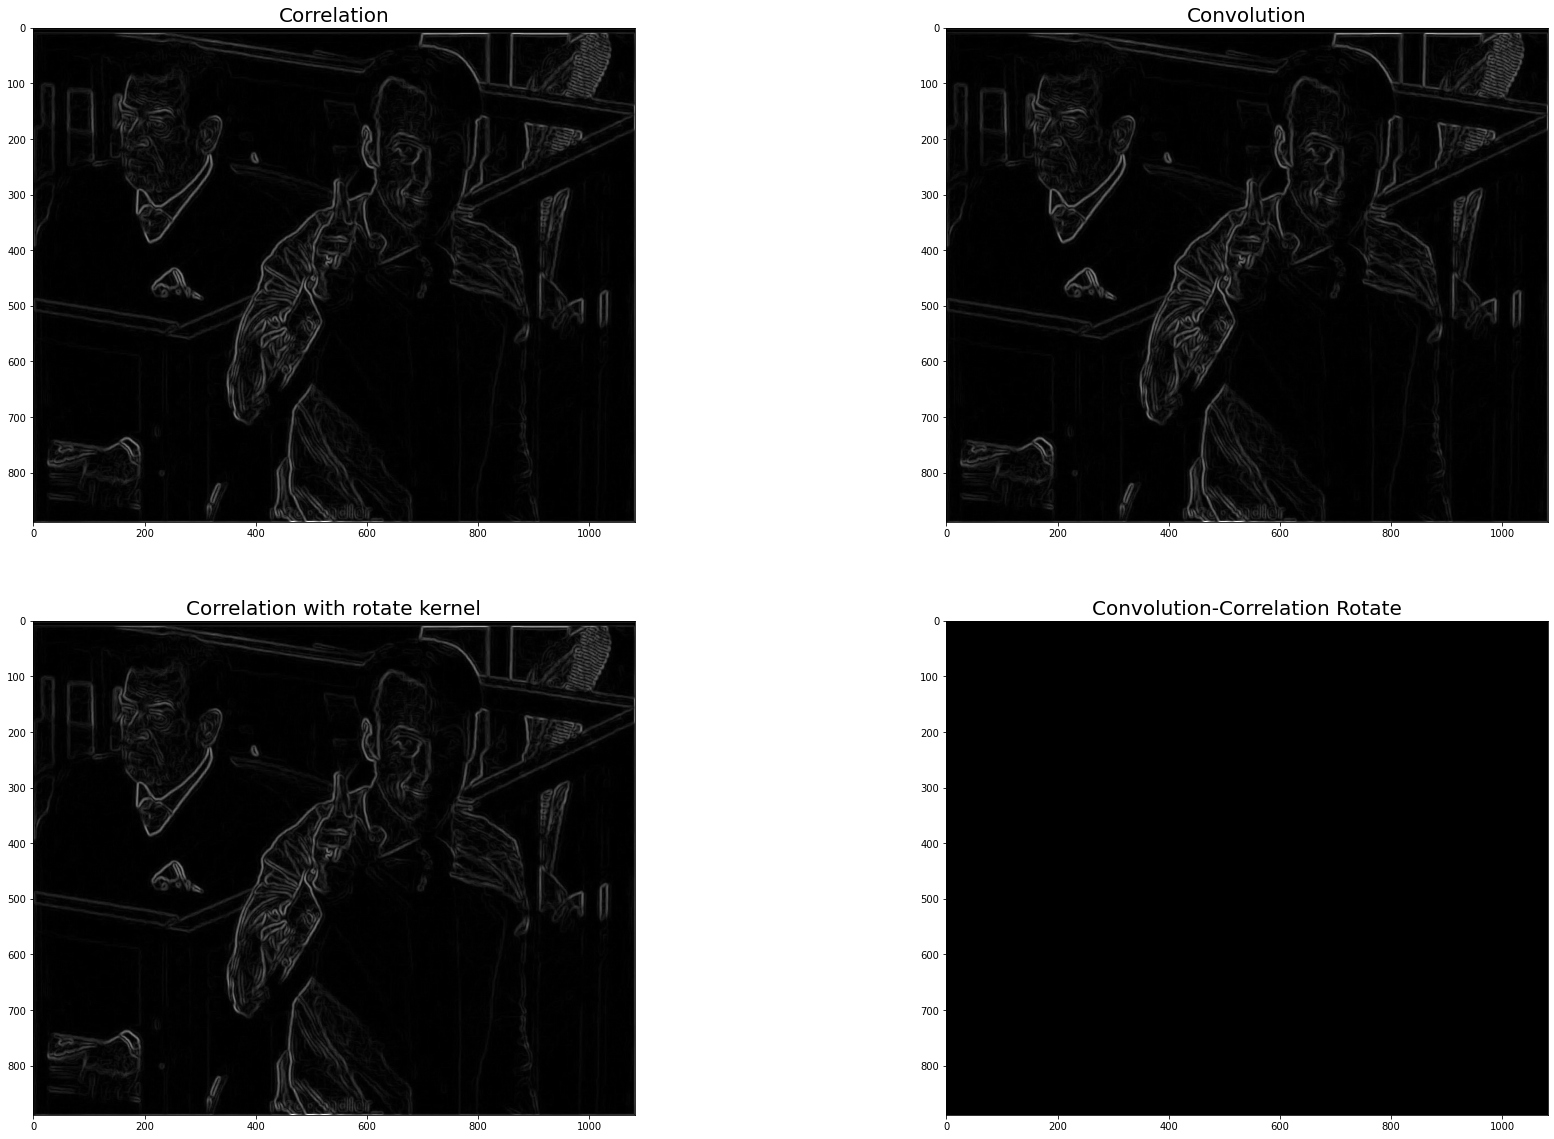

In [62]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(fix_corr,cmap=plt.cm.gray)
plt.title('Correlation',fontsize = 20)

plt.subplot(222)
plt.imshow(fix_conv,cmap=plt.cm.gray)
plt.title('Convolution',fontsize = 20)

plt.subplot(223)
plt.imshow(fix_rotate,cmap=plt.cm.gray)
plt.title('Correlation with rotate kernel',fontsize = 20)

plt.subplot(224)
plt.imshow(minus,cmap=plt.cm.gray)
plt.title('Convolution-Correlation Rotate',fontsize = 20)

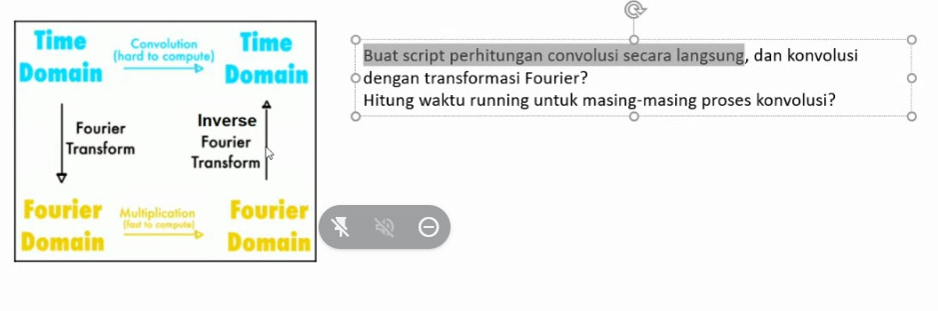

#### 2. Buat script perhitungan convolusi secara langsung dan konvolusi dengan transformasi fourier, hitung waktu running untuk masing-masing proses konvolusi.

In [63]:
start = time.time()
conv_fft = signal.fftconvolve(img_gray,kernel)
conv_fft = np.sqrt(conv_fft*conv_fft)
end = time.time()
fft_time = end-start

In [64]:
start = time.time()
conv_dir = signal.convolve(img_gray,kernel)
conv_dir = np.sqrt(conv_dir*conv_dir)
end = time.time()
dir_time = end-start

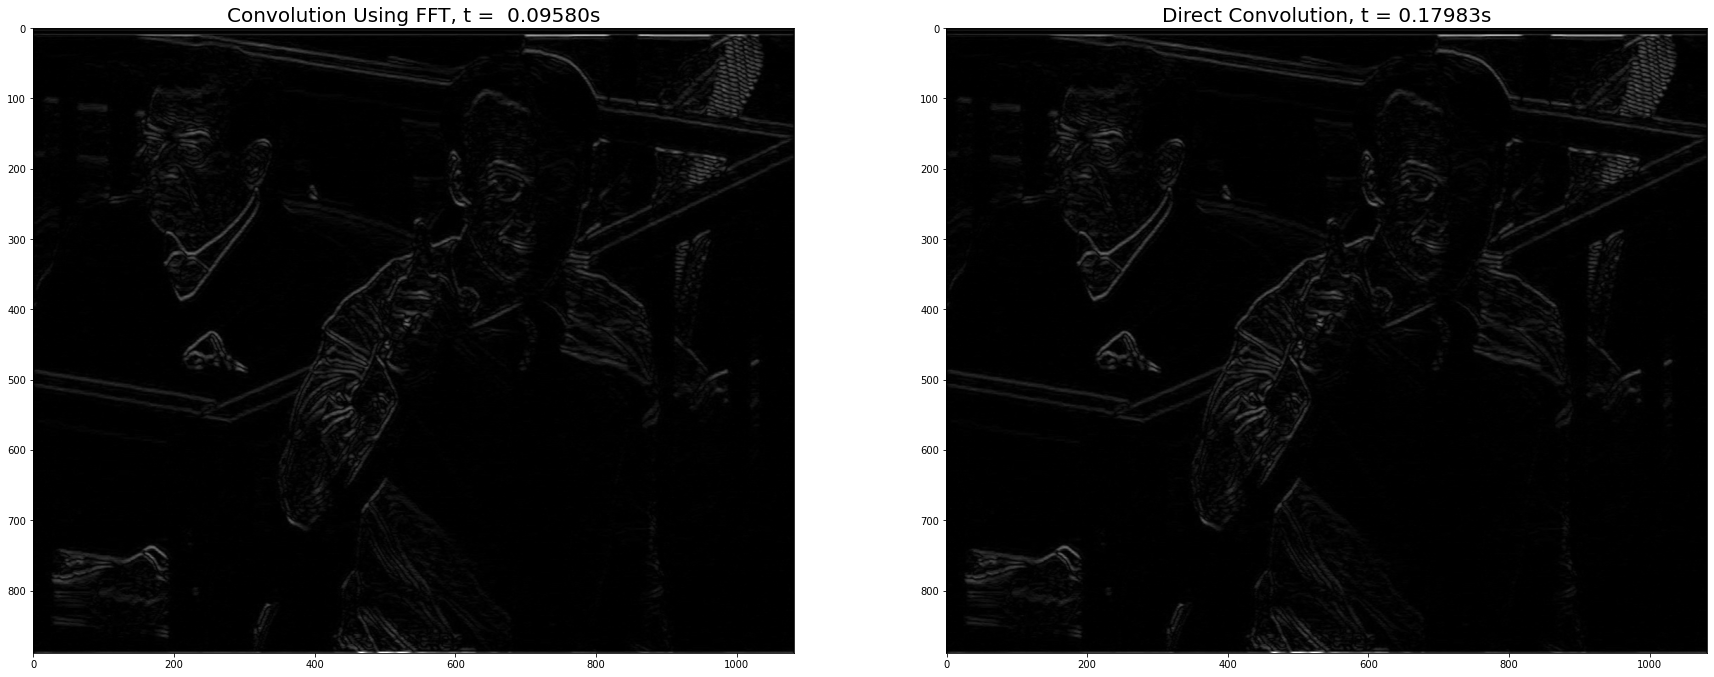

In [68]:
plt.figure(figsize=(30,20))
plt.subplot(121)
plt.imshow(conv_fft,cmap=plt.cm.gray)
plt.title(f'Convolution Using FFT, t =  {fft_time:.5f}s',fontsize = 20)

plt.subplot(122)
plt.imshow(conv_dir,cmap=plt.cm.gray)
plt.title(f'Direct Convolution, t = {dir_time:.5f}s',fontsize = 20)
plt.show()